In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('salary_data_cleaned.csv')
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min salary', 'max salary', 'avg salary',
       'job_state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark_yn',
       'excel_yn'],
      dtype='object')

In [3]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'


In [4]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist      279
na                  184
data engineer       119
analyst             102
manager              22
machine learning     22
director             14
Name: job_simp, dtype: int64

In [5]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [6]:
# fix state Los angeles
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [7]:
# Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']


0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [8]:
# competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df.num_comp

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [9]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [10]:
# hourly wage to annual
df.rename(columns = {'min salary': 'min_salary'}, inplace = True)
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['min_salary']

0      53
1      63
2      80
3      56
4      86
       ..
737    58
738    72
739    56
740    95
741    61
Name: min_salary, Length: 742, dtype: int64

In [11]:
df[df.hourly == 1][['hourly','min_salary','max salary']]

,hourly,min_salary,max salary
165,1,34,24
177,1,42,34
197,1,36,25
202,1,42,34
210,1,30,25
246,1,34,24
271,1,42,34
337,1,36,25
345,1,48,39
357,1,42,34


In [12]:
df.rename(columns = {'max salary': 'max_salary'}, inplace = True)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)
df[df.hourly == 1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [13]:
df.describe()

,Rating,Founded,hourly,employer provided,min_salary,max_salary,avg salary,same_state,age,python_yn,R_yn,spark_yn,excel_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


<AxesSubplot: >

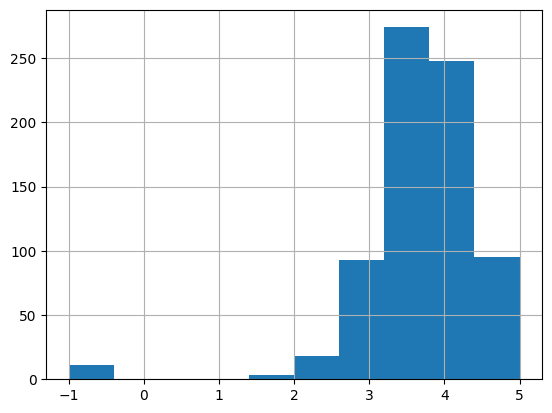

In [14]:
df.Rating.hist()

<AxesSubplot: >

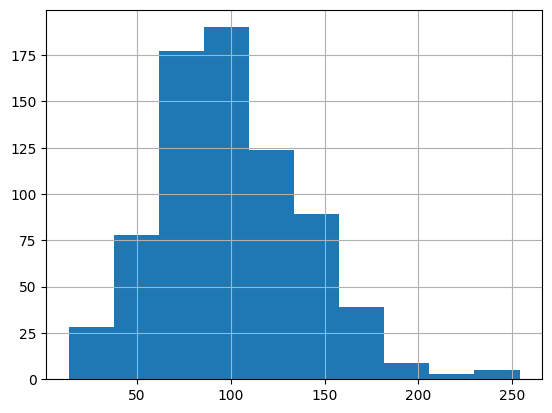

In [15]:
df['avg salary'].hist()

<AxesSubplot: >

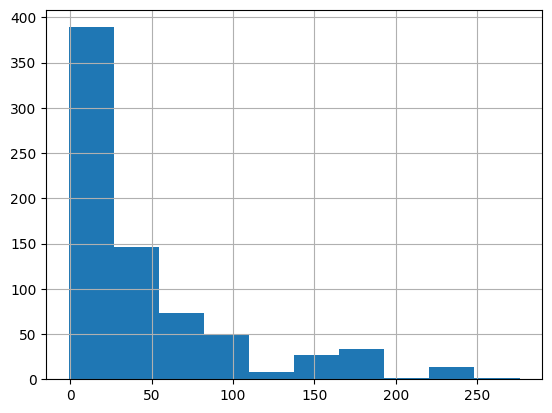

In [16]:
df.age.hist()

<AxesSubplot: >

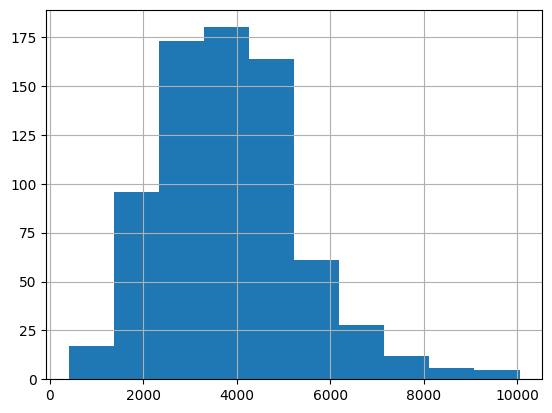

In [17]:
df.desc_len.hist()

<AxesSubplot: >

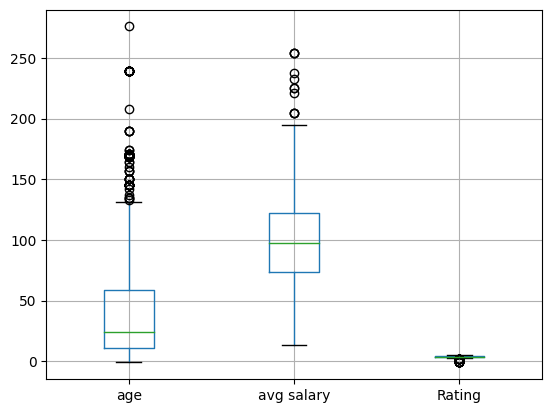

In [18]:
df.boxplot(column = ['age', 'avg salary', 'Rating'])

<AxesSubplot: >

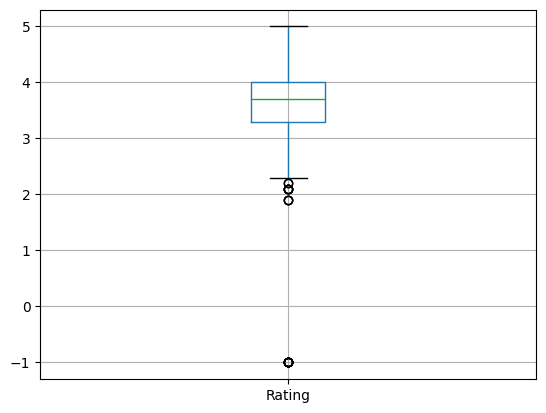

In [19]:
df.boxplot(column = 'Rating')

In [20]:
df[['age', 'avg salary', 'Rating', 'desc_len']].corr()

,age,avg salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.163911
avg salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
desc_len,0.163911,0.078808,-0.012281,1.000000


<AxesSubplot: >

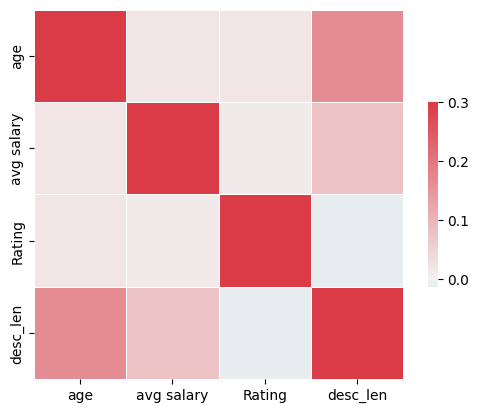

In [21]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age', 'avg salary', 'Rating', 'desc_len']].corr(), vmax= .3, center = 0, cmap = cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot: >

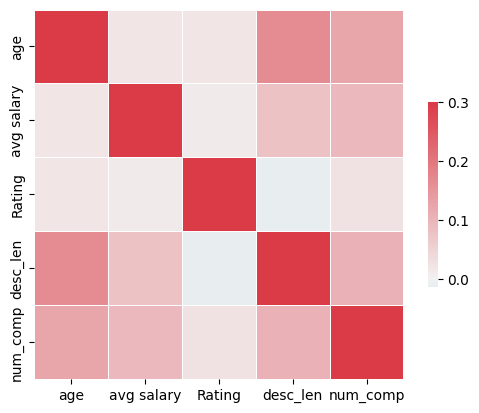

In [22]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age', 'avg salary', 'Rating', 'desc_len', 'num_comp']].corr(), vmax= .3, center = 0, cmap = cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

graph for Location: total = 200


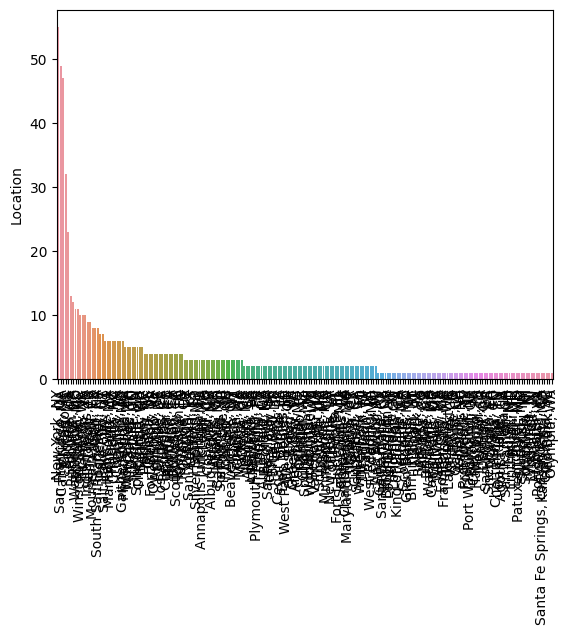

graph for Headquarters: total = 198


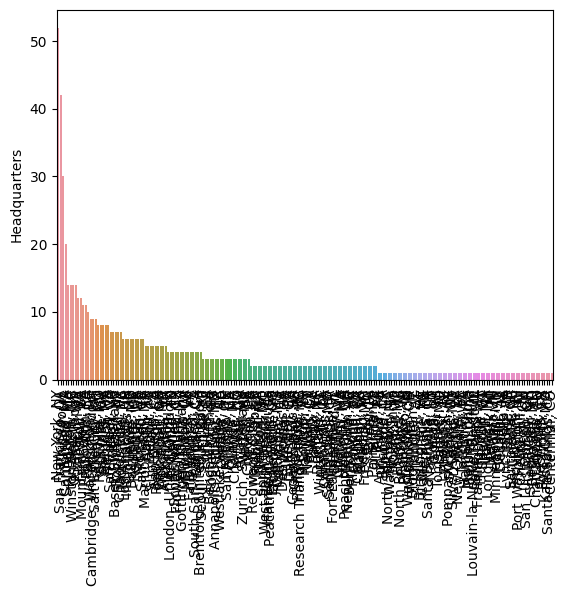

graph for Size: total = 9


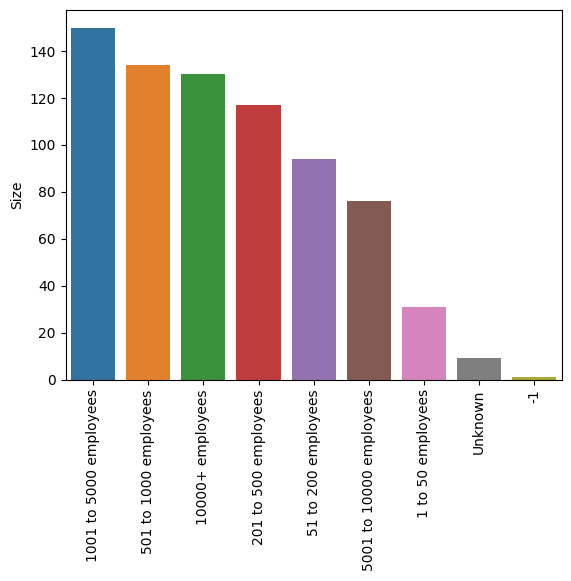

graph for Type of ownership: total = 11


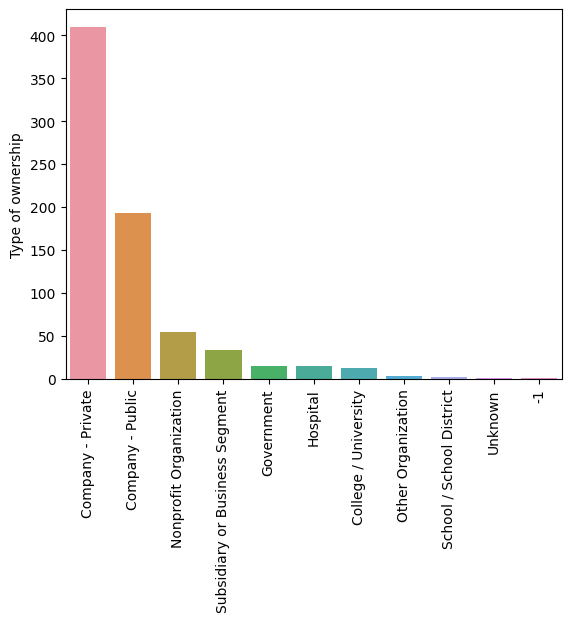

graph for Industry: total = 60


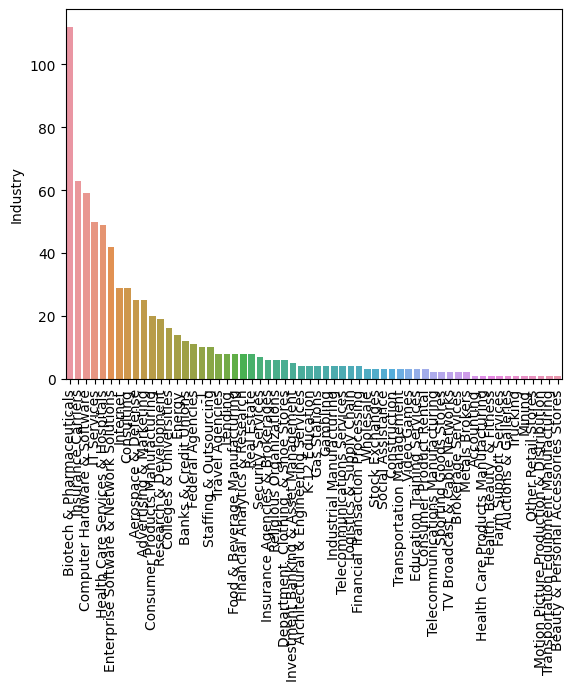

graph for Sector: total = 25


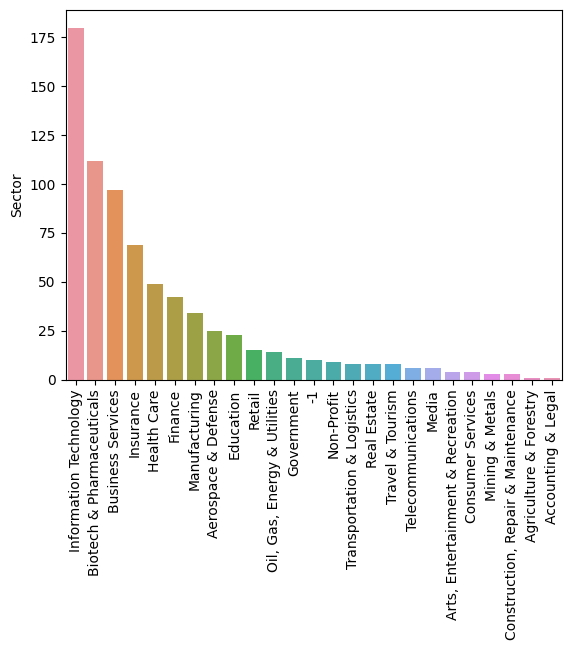

graph for Revenue: total = 14


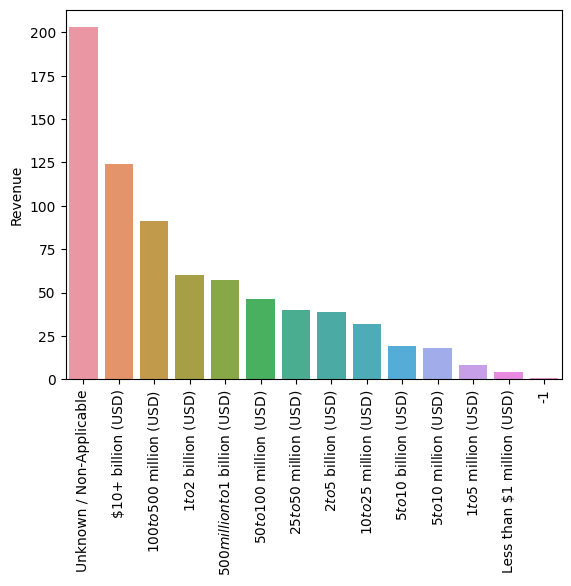

graph for Company Name: total = 343


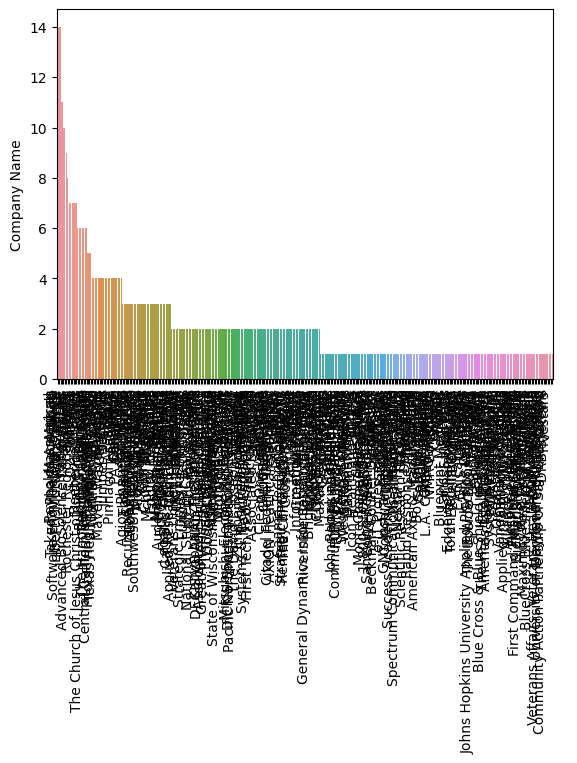

graph for job_state: total = 37


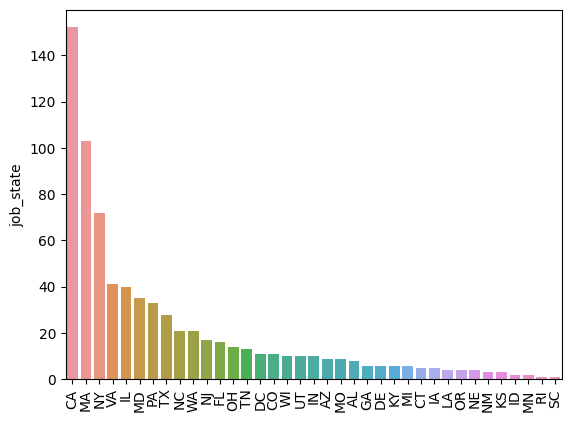

graph for same_state: total = 2


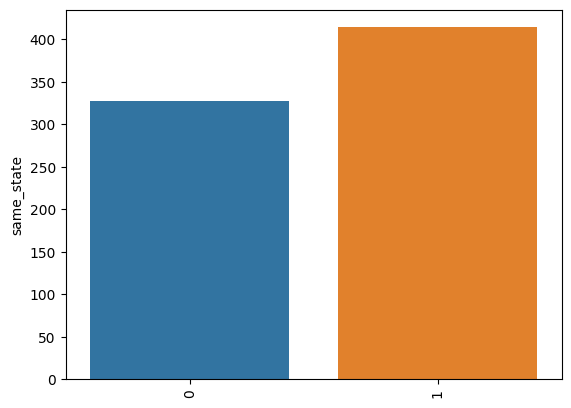

graph for python_yn: total = 2


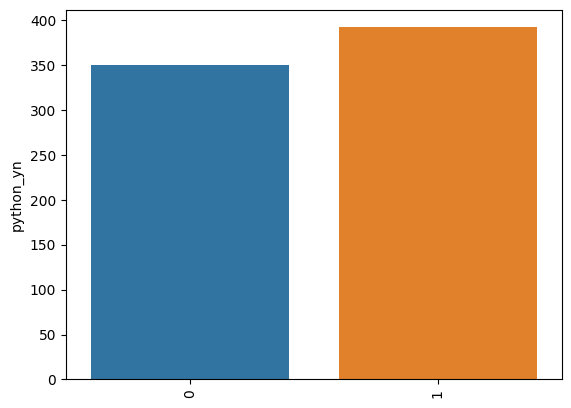

graph for R_yn: total = 2


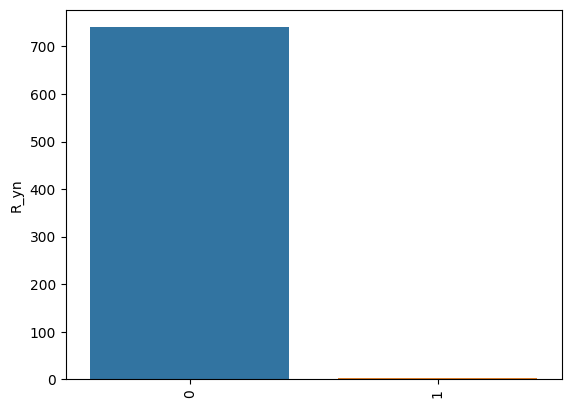

graph for spark_yn: total = 2


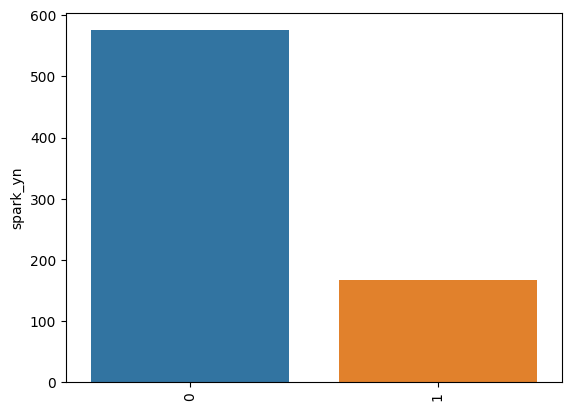

graph for excel_yn: total = 2


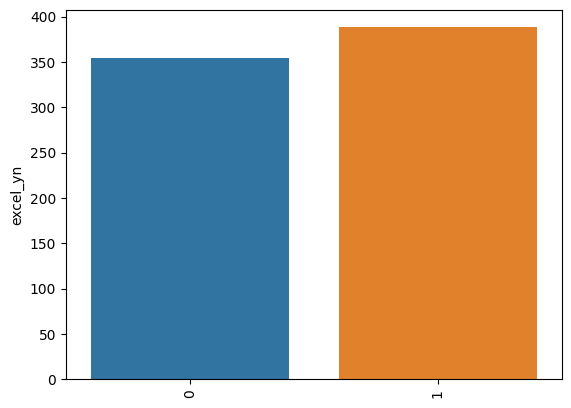

graph for job_simp: total = 7


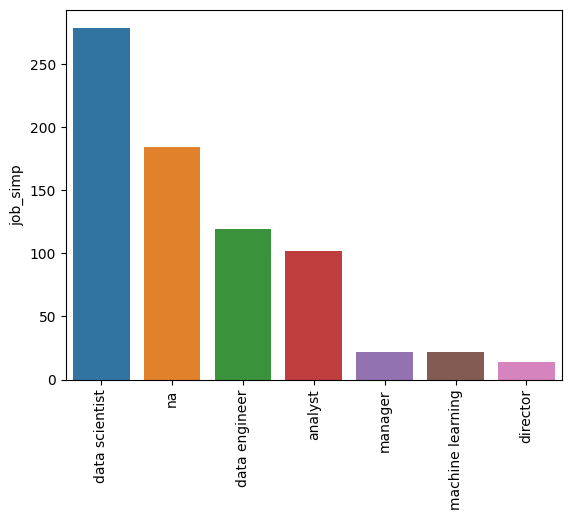

graph for seniority: total = 3


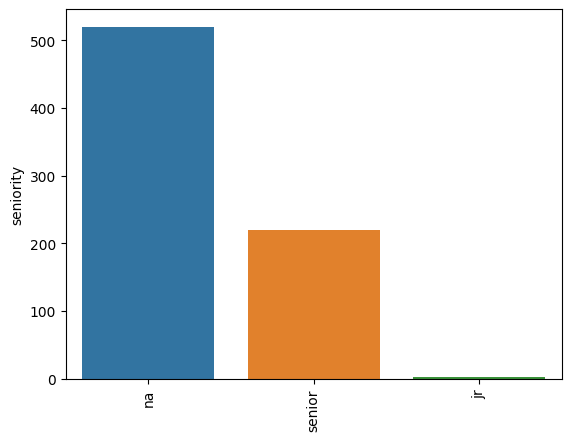

In [23]:
# Looking at categorical data
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company Name', 'job_state','same_state', 'python_yn', 'R_yn',
       'spark_yn', 'excel_yn', 'job_simp', 'seniority']]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y =cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


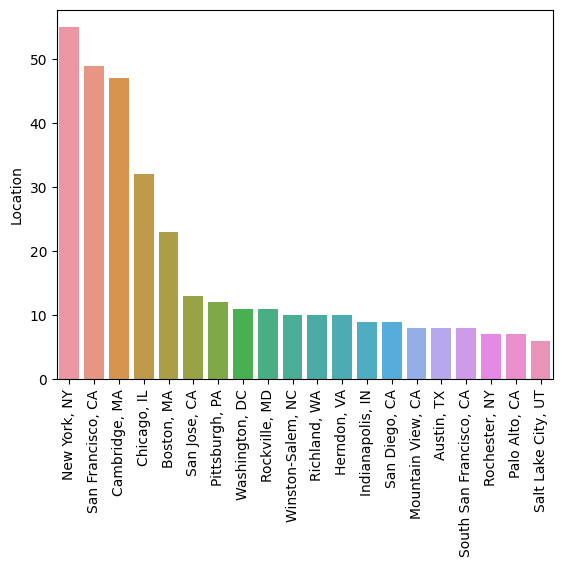

graph for Headquarters: total = 20


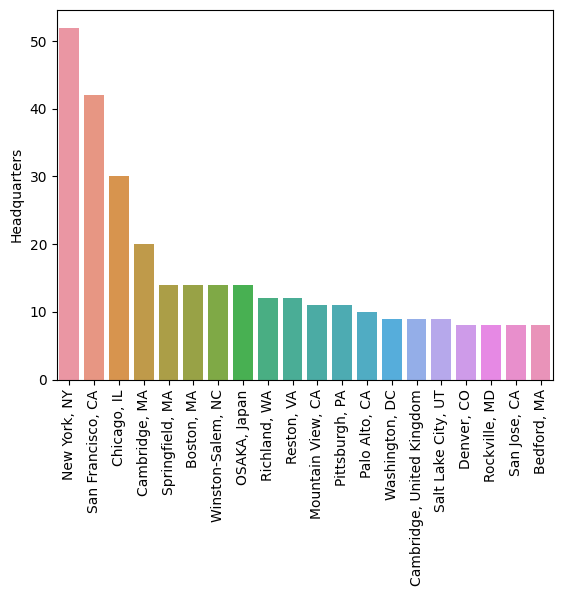

graph for Company Name: total = 20


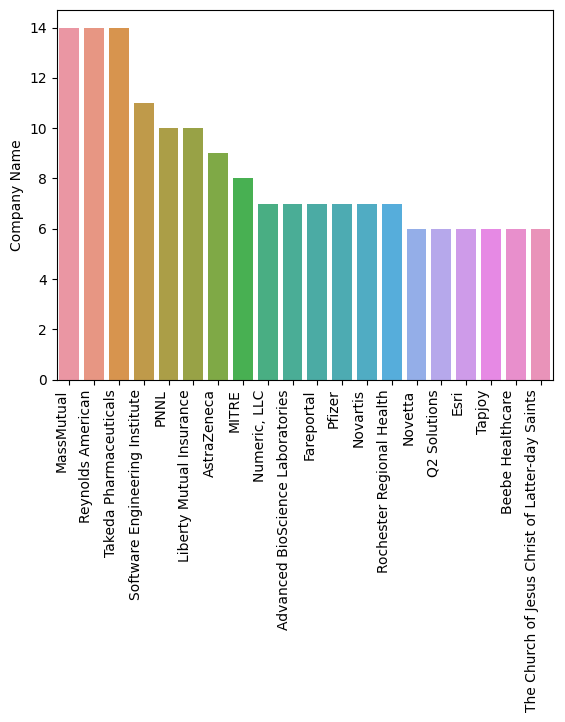

In [24]:
# focused view at top 20
for i in df_cat[['Location', 'Headquarters', 'Company Name']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y =cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [25]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary', 'avg salary',
       'job_state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark_yn',
       'excel_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [26]:
pd.pivot_table(df, index=['job_simp','seniority'], values='avg salary')

avg salary
job_simp         seniority            
analyst          jr          56.500000
                 na          61.155405
                 senior      79.092593
data engineer    na          96.701220
                 senior     124.689189
data scientist   jr         106.500000
                 na         107.043011
                 senior     138.956522
director         na         168.607143
machine learning na         119.133333
                 senior     142.071429
manager          na          84.022727
na               na          73.988189
                 senior     109.061404

In [27]:
pd.pivot_table(df, index=['job_state', 'job_simp'], values='avg salary').sort_values('job_state', ascending=False)

avg salary
job_state job_simp                  
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
...                              ...
AZ        analyst          55.000000
          na              124.500000
AL        na               43.750000
          data engineer    65.000000
          analyst          62.200000

[114 rows x 1 columns]

In [28]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index=['job_state', 'job_simp'], values='avg salary', aggfunc='count').sort_values('job_state', ascending=True)

avg salary
job_state job_simp                    
AL        analyst                    5
          data engineer              1
          na                         2
AZ        analyst                    1
          data engineer              5
          data scientist             1
          na                         2
CA        manager                    9
          machine learning           5
          na                        27
          data engineer             25
          analyst                   18
          data scientist            68
CO        analyst                    1
          data engineer              3
          data scientist             3
          machine learning           1
          na                         3
CT        data scientist             2
          na                         3
DC        analyst                    2
          data engineer              4
          data scientist             5
DE        na                         6
FL        data engineer              3
          data scientist             7
          analyst                    6
GA        data scientist             3
          na                         3
IA        analyst                    2
          data engineer              3
ID        analyst                    2
IL        na                         6
          analyst                    3
          data engineer              8
          data scientist            15
          director                   6
          machine learning           2
IN        na                         4
          data scientist             2
          data engineer              4
KS        machine learning           3
KY        data scientist             2
          na                         4
LA        analyst                    1
          data engineer              2
          na                         1
MA        manager                    5
          director                   6
          na                        46
          data engineer             12
          analyst                    4
          data scientist            30
MD        data scientist            13
          na                        16
          analyst                    3
          data engineer              3
MI        data scientist             4
          manager                    2
MN        analyst                    1
          data engineer              1
MO        analyst                    2
          data scientist             3
          manager                    1
          na                         3
NC        data engineer              6
          data scientist             3
          na                        12
NE        na                         4
NJ        na                         1
          manager                    2
          director                   2
          data engineer              2
          data scientist             4
          analyst                    6
NM        data scientist             3
NY        analyst                   14
          data engineer              4
          data scientist            40
          machine learning           2
          na                        12
OH        na                         3
          analyst                    4
          data scientist             7
OR        data scientist             3
          data engineer              1
PA        analyst                    8
          data engineer              1
          data scientist             6
          machine learning           7
          manager                    3
          na                         8
RI        analyst                    1
SC        na                         1
TN        analyst                    2
          data engineer             10
          data scientist             1
TX        data scientist            13
          na                         7
          data engineer              8
UT        analyst                    4
          d

In [29]:
# Data scientist salary by state
pd.pivot_table(df[df.job_simp == 'data scientist'], index='job_state', values='avg salary').sort_values('avg salary', ascending=False)

,avg salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [30]:
# Salary by rating
# industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excelk, desc_len, type of ownership
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly', 'employer provided', 'python_yn', 'R_yn', 'spark_yn', 'excel_yn', 'Type of ownership', 'avg salary']]
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg salary').sort_values('avg salary', ascending =False))

Rating
        avg salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg salary' not 1-dimensional

In [31]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg salary', aggfunc= 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [41]:
df.to_csv('eda_data.csv')
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,same_state,age,python_yn,R_yn,spark_yn,excel_yn,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,47,1,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,36,1,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,10,1,0,1,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,55,1,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,22,1,0,0,1,data scientist,na,2728,3


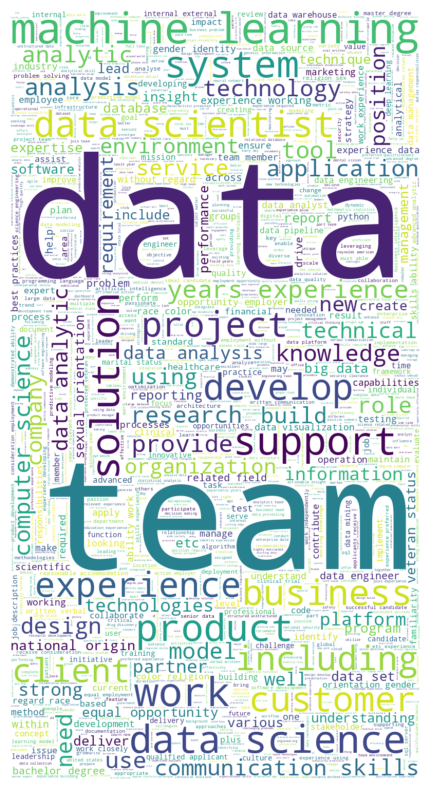

In [33]:
# word cloud

#nltk library had additional modules that needed to be manually downloaded via CLI
#python -m nltk.downloader stopwords
#python -m nltk.downloader punkt

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()